In [ ]:
from IPython.utils import io
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion


with io.capture_output() as captured:
  if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
      print("Python3 is needed!");
      print("How to fix: Runtime/Change_runtime_type/Python 3");
      sys.exit()
      
  try:
      from dolfin import *; from mshr import *
  except ImportError as e:
      !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
      !add-apt-repository -y ppa:fenics-packages/fenics
      !apt-get update -qq
      !apt install -y --no-install-recommends fenics
      from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files

dolfin version: 2019.1.0


In [ ]:
class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], -1)

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 4.0)
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 5.0)


# Define domain
domain = Rectangle(Point(0, -1), Point(5, 4))


# Initialize sub-domain instances
top = Top()
left = Left()
right = Right()
bottom = Bottom()

#initialize mesh
mesh = generate_mesh(domain, 100)

# Initialize mesh function for interior domains
domains = MeshFunction("size_t", mesh,2)

boundaries = MeshFunction("size_t", mesh,1)
boundaries.set_all(0)
left.mark(boundaries, 1)
top.mark(boundaries, 2)
right.mark(boundaries, 3)
bottom.mark(boundaries, 4)

In [ ]:
#Helmholtz equation with Dirichlet boundary conditions
def Helmholtz(mesh, k, alpha, xs,f_r):
    
# squared wavenumber k

 #damping coefficient alpha

# Define finite elements spaces and build mixed space
  V=VectorFunctionSpace(mesh,"CG",1,dim=2)

# Define Dirichlet boundary conditions at top(2) and (bottom)(4), right(3), left (1) boundaries
  bcs = [DirichletBC(V, (0.0,0), boundaries, 1), DirichletBC(V, (0.0,0), boundaries, 2), 
DirichletBC(V, (0.0,0), boundaries, 3), DirichletBC(V, (0,0), boundaries, 4)]

# define variational problem/weak form as a vector
  (u_r, u_i) = TrialFunction(V)
  (v_r, v_i) = TestFunction(V)

  a_r = (-inner(grad(u_r), grad(v_r)) + k**2*u_r*v_r-alpha*k*u_i*v_r) * dx
  a_i = (-inner(grad(u_i), grad(v_i)) + k**2*u_i*v_i + k*alpha*u_r*v_i) * dx
  L_r = f_r * v_r * dx #look up degree
  L_i = Constant(0) * v_i * dx

  a = a_r + a_i
  L = L_r + L_i
  A, b = assemble_system(a, L, bcs) #include boundary conditions (mass matrix A)

#define inhomogenity
  delta = PointSource(V, xs, 1)  # negative amplitude accounts for -v in inhomogeneous wave equation (1/c^2)(u''-grad^2u)=-v
  delta.apply(b)                # xs=Point(2.5,1.5) for example



# Compute solution
  u = Function(V)
  solve(A, u.vector(), b)
  (u_r, u_i) = u.split()

# Plot sigma and u
  plt.figure()
  plot(u_r)

  plt.figure()
  plot(u_i)

  plt.show()
  return u_r, u_i

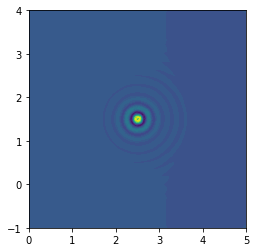

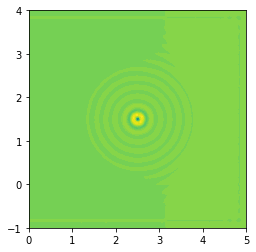

(Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 3), FiniteElement('Lagrange', triangle, 1)), 296),
 Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 3), FiniteElement('Lagrange', triangle, 1)), 300))

In [ ]:
alpha=10 #damping coefficient 
k=Constant(2*pi*5) #wave number
xs=Point(2.5, 1.5)
f=Expression("sin(x[0])", degree=2)
Helmholtz(mesh, k, alpha, xs,f)

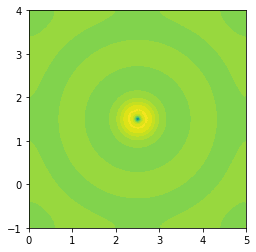

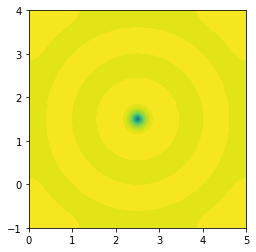

(Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 3), FiniteElement('Lagrange', triangle, 1)), 1210),
 Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 3), FiniteElement('Lagrange', triangle, 1)), 1214))

In [ ]:
alpha1=15
k1=Constant(pi)
f1=Constant(0.0)
Helmholtz(mesh, k1, alpha1, xs,f1)